In [37]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import skimage as ski
from img_util import imshow

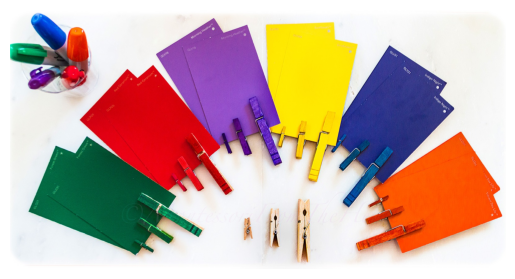

In [15]:
img = cv2.imread('img.jpeg')
imshow(img[:,:,::-1],'')

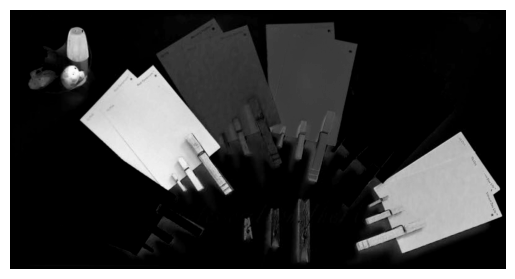

In [16]:
red_img = cv2.subtract(
    img[:,:,-1], cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
)
imshow(red_img,'','gray')

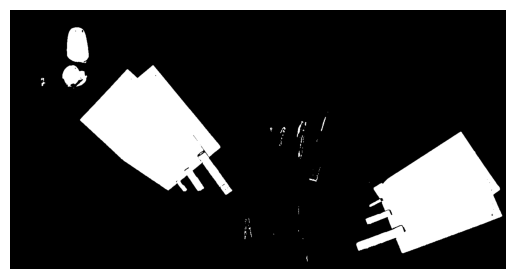

In [21]:
_, red_bw = cv2.threshold(red_img, 60,255, cv2.THRESH_BINARY)
imshow(red_bw,'','gray')

In [32]:
strel = cv2.getStructuringElement(cv2.MORPH_RECT, (10,10))
strel

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]], dtype=uint8)

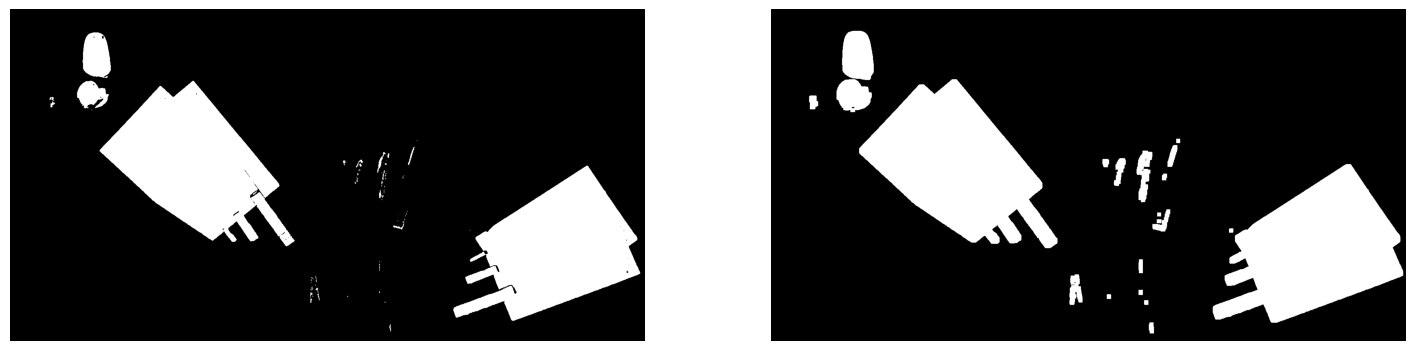

In [27]:
plt.figure(figsize=(18,6))
plt.subplot(121); imshow(red_bw, '','gray')
plt.subplot(122)
red_dilate = cv2.dilate(red_bw, strel)
imshow(red_dilate,'','gray')

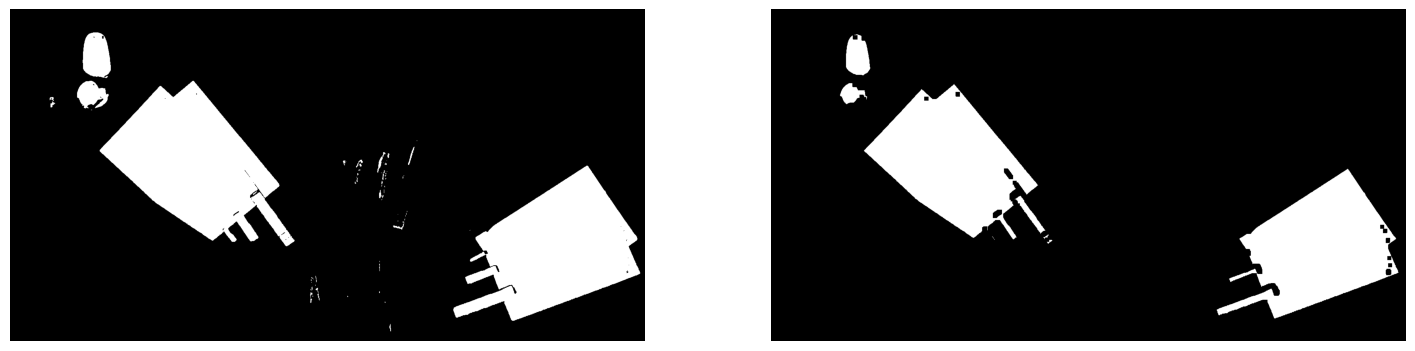

In [28]:
plt.figure(figsize=(18,6))
plt.subplot(121); imshow(red_bw, '','gray')
plt.subplot(122)
red_erode = cv2.erode(red_bw, strel)
imshow(red_erode,'','gray')

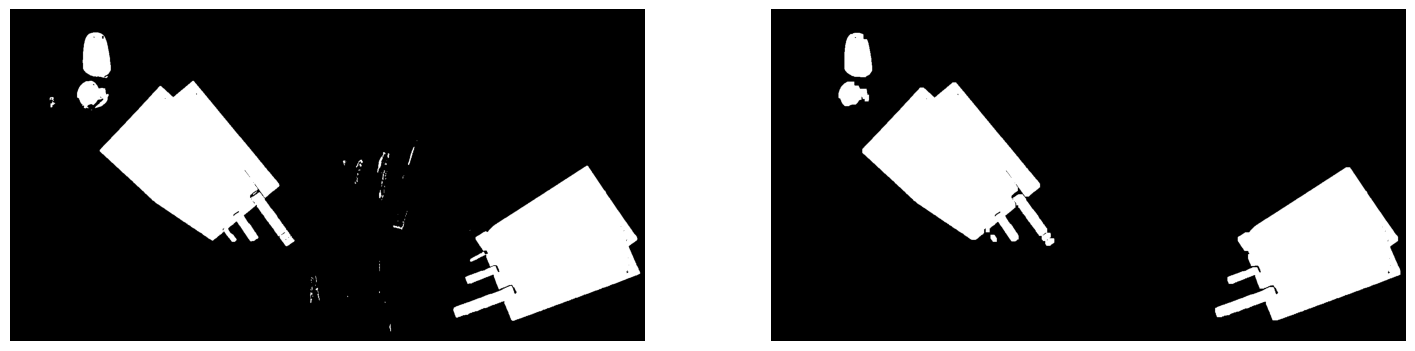

In [33]:
plt.figure(figsize=(18,6))
plt.subplot(121); imshow(red_bw, '','gray')
plt.subplot(122)
red_open = cv2.morphologyEx(red_bw, cv2.MORPH_OPEN, strel, iterations=1)
imshow(red_open,'','gray')

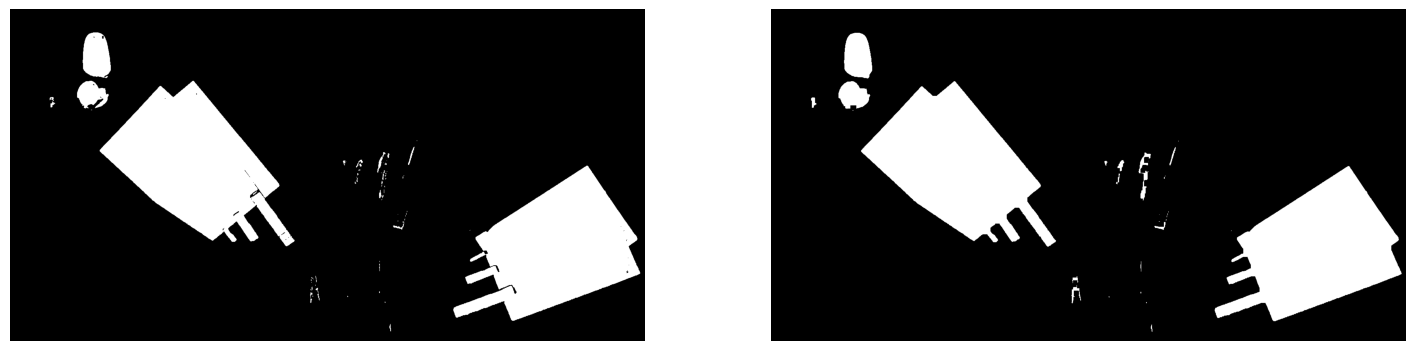

In [34]:
plt.figure(figsize=(18,6))
plt.subplot(121); imshow(red_bw, '','gray')
plt.subplot(122)
red_close = cv2.morphologyEx(red_bw, cv2.MORPH_CLOSE, strel, iterations=1)
imshow(red_close,'','gray')

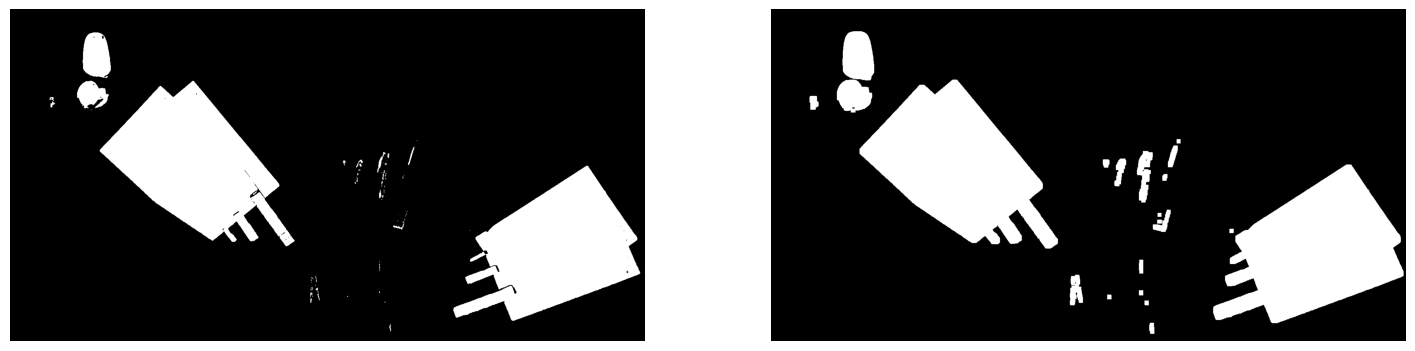

In [36]:
plt.figure(figsize=(18,6))
plt.subplot(121); imshow(red_bw, '','gray')
plt.subplot(122)
red_close2 = cv2.morphologyEx(red_dilate, cv2.MORPH_OPEN, strel, iterations=1)
imshow(red_close2,'','gray')

In [38]:
help(ski.morphology.remove_small_objects)

Help on function remove_small_objects in module skimage.morphology.misc:

remove_small_objects(ar, min_size=64, connectivity=1, *, out=None)
    Remove objects smaller than the specified size.
    
    Expects ar to be an array with labeled objects, and removes objects
    smaller than min_size. If `ar` is bool, the image is first labeled.
    This leads to potentially different behavior for bool and 0-and-1
    arrays.
    
    Parameters
    ----------
    ar : ndarray (arbitrary shape, int or bool type)
        The array containing the objects of interest. If the array type is
        int, the ints must be non-negative.
    min_size : int, optional (default: 64)
        The smallest allowable object size.
    connectivity : int, {1, 2, ..., ar.ndim}, optional (default: 1)
        The connectivity defining the neighborhood of a pixel. Used during
        labelling if `ar` is bool.
    out : ndarray
        Array of the same shape as `ar`, into which the output is
        placed. By d

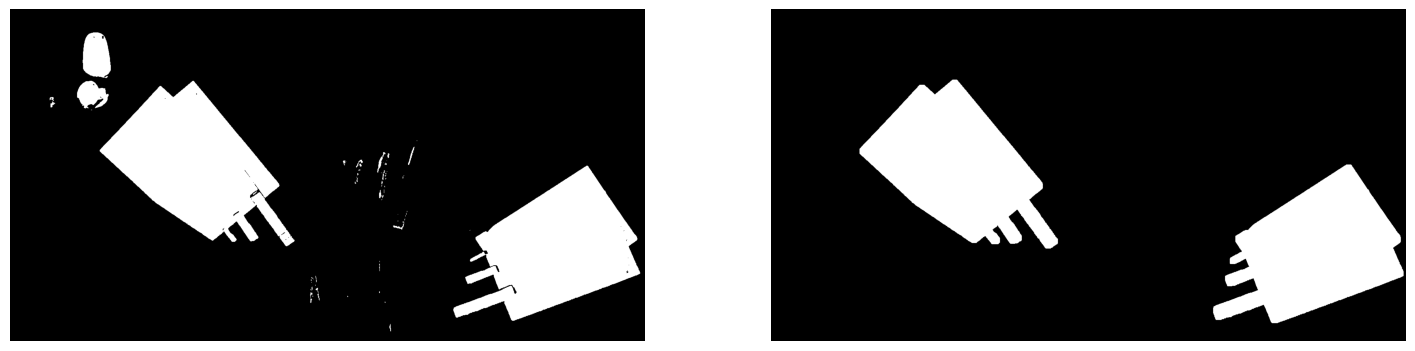

In [45]:
plt.figure(figsize=(18,6))
plt.subplot(121); imshow(red_bw, '','gray')
plt.subplot(122)
red_close3 = ski.morphology.remove_small_objects(
    red_close2.astype(bool), 15000
)
imshow(red_close3,'','gray')

In [47]:
red_close3.dtype

dtype('bool')

In [49]:
rp = ski.measure.regionprops(
    ski.measure.label(
        red_close3.astype('uint8')
    )
)
rp

In [51]:
ski.measure.label(
        red_close3.astype('uint8')
    ).max()

2

In [54]:
(red_close3.astype('uint8')*255).max()

255

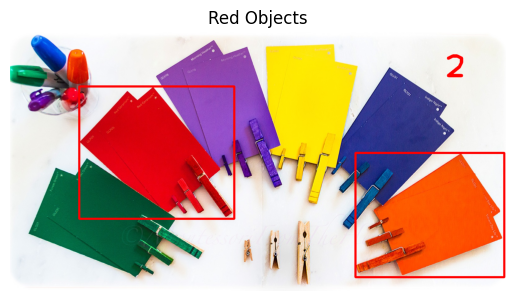

In [83]:
# summary
img = cv2.imread('img.jpeg')
red_img = cv2.subtract(
    img[:,:,-1], cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
)
_, red_bw = cv2.threshold(red_img, 60,255, cv2.THRESH_BINARY)
strel = cv2.getStructuringElement(cv2.MORPH_RECT, (10,10))
red_dilate = cv2.dilate(red_bw, strel)
red_close2 = cv2.morphologyEx(
    red_dilate, cv2.MORPH_OPEN, strel, iterations=1
)
red_close3 = ski.morphology.remove_small_objects(
    red_close2.astype(bool), 15000
)
rp = ski.measure.regionprops(
    ski.measure.label(red_close3.astype('uint8'))
)
img_copy = img.copy()
for r in rp:
    y1,x1,y2,x2 = r.bbox
    cv2.rectangle(img_copy, (x1,y1),(x2,y2), color=[0,0,255],thickness=5)
count = str(len(rp))
cv2.putText(
    img_copy, count, (img_copy.shape[1]-200,150), 
    cv2.FONT_HERSHEY_PLAIN, 7,(0,0,255),thickness=10
)
imshow(img_copy[:,:,::-1],'Red Objects')

In [84]:
type(img.shape)


tuple

In [86]:
img.shape[1]

1600

In [93]:
vid = cv2.VideoCapture(0)  # write 0 here
while True:
    ack, img = vid.read()
    if ack:
        red_img = cv2.subtract(
            img[:,:,-1], cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        )
        _, red_bw = cv2.threshold(red_img, 60,255, cv2.THRESH_BINARY)
        strel = cv2.getStructuringElement(cv2.MORPH_RECT, (10,10))
        red_dilate = cv2.dilate(red_bw, strel)
        red_close2 = cv2.morphologyEx(
            red_dilate, cv2.MORPH_OPEN, strel, iterations=1
        )
        red_close3 = ski.morphology.remove_small_objects(
            red_close2.astype(bool), 15000
        )
        rp = ski.measure.regionprops(
            ski.measure.label(red_close3.astype('uint8'))
        )
        img_copy = img.copy()
        for r in rp:
            y1,x1,y2,x2 = r.bbox
            cv2.rectangle(img_copy, (x1,y1),(x2,y2), color=[255,0,0],thickness=5)
        count = str(len(rp))
        cv2.putText(
            img_copy, count, (img_copy.shape[1]-200,150), 
            cv2.FONT_HERSHEY_PLAIN, 7,(0,0,255),thickness=10
        )
        
        cv2.imshow('Preview',img_copy)
        key = cv2.waitKey(1)
        if key == ord('x'):
            break
cv2.destroyAllWindows()
cv2.waitKey(1)   # do not write this step
vid.release()

In [90]:
ack

True